# 🎧 Clustering Analysis on Most Streamed Spotify Songs 2024

## 📖 Introduction

This notebook presents a clustering analysis using **K-Means** on a dataset titled **"Most Streamed Spotify Songs 2024"**. The goal is to uncover hidden patterns or natural groupings of songs based on their features such as stream counts, playlist reach, popularity, and platform-specific metrics.

This analysis is part of a Machine Learning assignment, where the main objective is to:
- Explore the dataset thoroughly (EDA),
- Perform clustering using the **K-Means** algorithm,
- Analyze and interpret the resulting clusters.

---

## 🎯 Objective

To apply **K-Means clustering** on a real-world dataset to discover groups of similar songs based on numerical attributes such as popularity metrics across platforms.

---

## 📂 Dataset Description

The dataset contains over **4,600** songs along with **29** features, including:
- Song title, artist, and album information,
- Number of streams on Spotify, YouTube, Apple Music, etc.,
- Playlist counts and reach across platforms,
- Popularity indicators (Shazam counts, explicit label, etc.).

This dataset is rich in numerical features,

Sources: [Kaggle - Most Streamed Spotify Songs 2024](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024)

## 🔄 Analysis Workflow

The following steps will be conducted:

1. **Setup and Library Import**  
   Load all necessary Python packages.

2. **Data Loading**  
   Read and preview the dataset.

3. **Exploratory Data Analysis (EDA)**  
   Understand the dataset’s structure, detect missing values, visualize distributions and correlations.

4. **Data Preprocessing**  
   Select relevant numerical features and prepare the data for clustering (scaling, cleaning).

5. **K-Means Clustering**  
   Apply the K-Means algorithm and determine the optimal number of clusters using Elbow and Silhouette methods.

6. **Cluster Visualization and Interpretation**  
   Reduce data dimensions with PCA and visualize clusters. Analyze each cluster's characteristics.

7. **Conclusion**  
   Summarize insights and reflect on the findings.

# 📌 Step 1: Setup and Import Libraries

We begin by importing the necessary Python libraries. These include:

- `pandas` and `numpy` for data handling.
- `matplotlib` and `seaborn` for data visualization.
- `sklearn` for preprocessing and applying K-Means clustering.
- `PCA` for reducing data dimensionality to visualize clusters.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings


sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

# 📌 Step 2: Load Dataset

We upload and load the dataset titled **"Most Streamed Spotify Songs 2024"**. The file is encoded in `latin1` due to some special characters.

Let’s preview the first few rows to understand the data structure.

In [2]:
# Load dataset
df = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding="latin1")

# Lihat 5 data teratas
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


# 📌 Step 3: Exploratory Data Analysis (EDA)

We now explore the dataset:

1. **Data Dimensions:** The dataset contains over 4,600 rows and 29 columns.
2. **Missing Values:** Several columns contain missing values and need handling.
3. **Descriptive Statistics:** We examine numerical statistics such as mean, std, min, and max.
4. **Correlation Matrix:** A heatmap helps us identify which numeric features are highly correlated.
5. **Spotify Streams Distribution:** Reveals how popularity is distributed.
6. **Explicit Content Distribution:** Allows us to see how many tracks are marked as explicit.
7. **Top 10 Artist:** Show us the most frequent Artist streamed songs on 2024
8. **Release Year:** Reveals the distribution of song year release
9. **Platform popularity:** A comparison of platform frequently used by user

From the EDA, we can identify relevant features for clustering, check data quality, and understand data behavior.

## ❓️ 1. Data information and dimension

In [3]:
# Shape and column info
print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()

Dataset shape: (4600, 29)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   objec

##❌️ 2. Checking Missing values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Artist                           5
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
dtype: int64


## 📐 3. Summary Statistics (Numerical Columns)

We focus on a subset of numeric columns with meaningful data:

In [5]:
# Select the desired numerical features
selected_features_for_corr = [
    'Track Score',
    'Spotify Streams',
    'Spotify Popularity',
    'Apple Music Playlist Count',
    'Deezer Playlist Count',
    'Amazon Playlist Count',
    'Explicit Track'
]

numeric_corr_df = df[selected_features_for_corr].copy()
numeric_corr_df['Spotify Streams'] = numeric_corr_df['Spotify Streams'].astype(str).str.replace(',', '', regex=False).astype(float)

# Describe numerical columns
numeric_corr_df.describe()

,Track Score,Spotify Streams,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track
count,4600.000000,4.487000e+03,3796.000000,4039.00000,3679.000000,3545.000000,4600.000000
mean,41.844043,4.473873e+08,63.501581,54.60312,32.310954,25.348942,0.358913
std,38.543766,5.384439e+08,16.186438,71.61227,54.274538,25.989826,0.479734
min,19.400000,1.071000e+03,1.000000,1.00000,1.000000,1.000000,0.000000
25%,23.300000,7.038630e+07,61.000000,10.00000,5.000000,8.000000,0.000000
50%,29.900000,2.398507e+08,67.000000,28.00000,15.000000,17.000000,0.000000
75%,44.425000,6.283638e+08,73.000000,70.00000,37.000000,34.000000,1.000000
max,725.400000,4.281469e+09,96.000000,859.00000,632.000000,210.000000,1.000000


 Notably:
- `Track Score` shows very high values (outliers possible).
- `Explicit Track` is a binary feature (0 = clean, 1 = explicit).

## 🔗 4. Top Feature Correlations

Top correlated feature pairs:

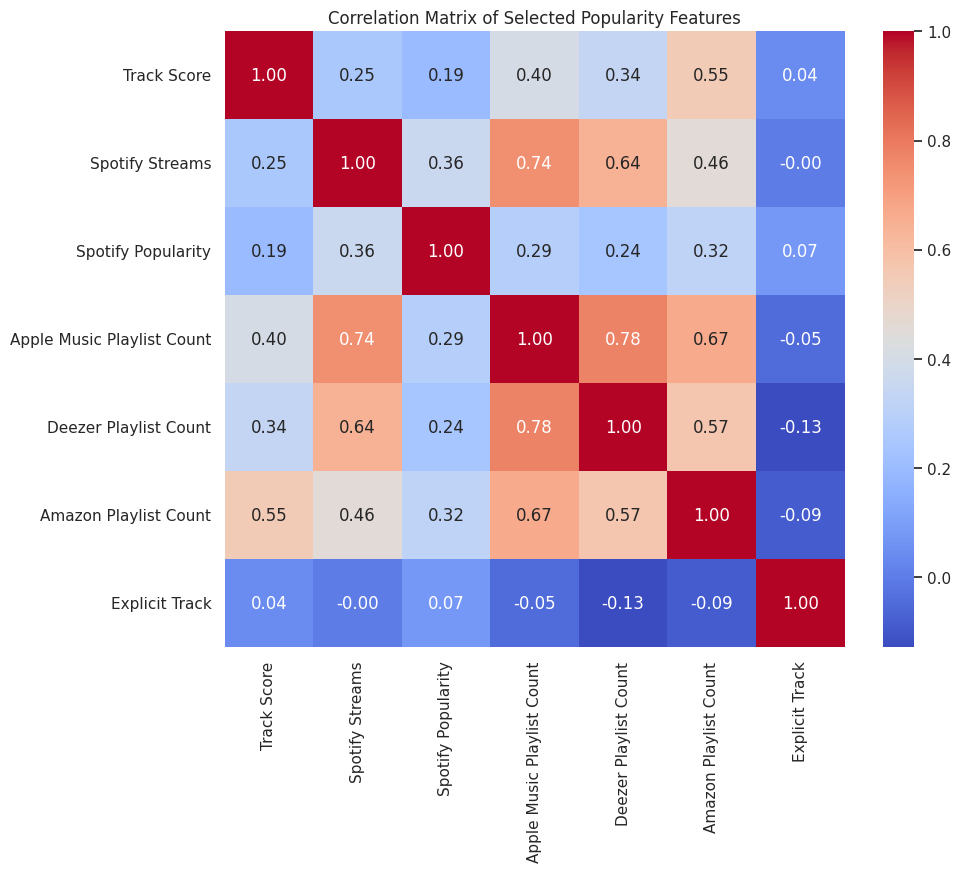

In [6]:
# Calculate the correlation matrix for the selected features
correlation_matrix_selected = numeric_corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix_selected, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Selected Popularity Features")
plt.show()


Although we selected only 7 features, the correlation matrix still shows high correlation among platform playlist counts (e.g., Apple vs. Deezer = 0.78).

This indicates a level of feature redundancy that may affect clustering performance.

Therefore, we applied **Principal Component Analysis (PCA)** to:
- Reduce multicollinearity
- Improve cluster separability
- Enable 2D visualization of high-dimensional clustering results

## 🎧 5. Spotify Streams Distribution

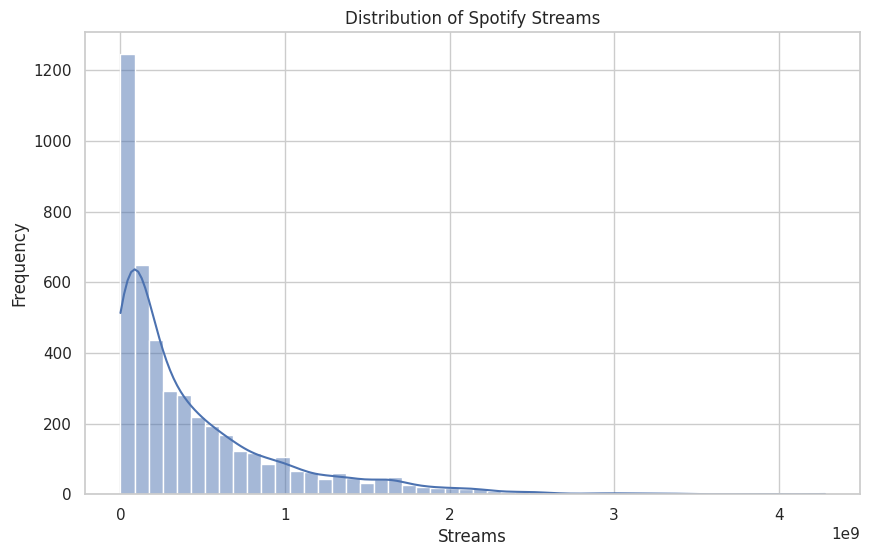

In [7]:
# Distribution of Spotify Streams
plt.figure(figsize=(10,6))
sns.histplot(df['Spotify Streams'].str.replace(',', '').astype(float), bins=50, kde=True)
plt.title("Distribution of Spotify Streams")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.show()

There is a **long-tail distribution** (right-skewed) where a few songs are extremely popular, while most have relatively low stream counts.

This skew needs to be addressed before clustering (via standardization or log scaling).

## 🧱 6. Explicit Content Distribution


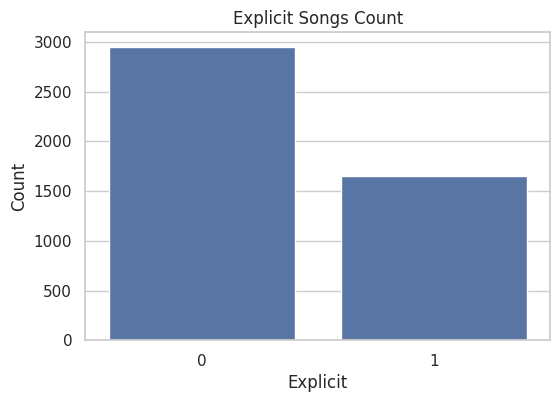

In [8]:
# Countplot: Explicit vs Non-explicit
plt.figure(figsize=(6,4))
sns.countplot(x='Explicit Track', data=df)
plt.title("Explicit Songs Count")
plt.xlabel("Explicit")
plt.ylabel("Count")
plt.show()

Roughly **36%** of songs are marked as explicit. This may serve as an auxiliary label to interpret cluster results later.

## 🧑‍🎤 7. Top 10 Most Frequent Artists


In [9]:
df['Artist'].value_counts().head(10)

,count
Artist,
Taylor Swift,63
Drake,63
Bad Bunny,60
KAROL G,32
The Weeknd,31
Travis Scott,30
Billie Eilish,27
Ariana Grande,26
Future,23


These artists may influence cluster formation due to repeated appearances and consistent style or fanbase

##🗓 8. Release Date Distribution

<Axes: title={'center': 'Number of Songs by Release Year'}, xlabel='Year'>

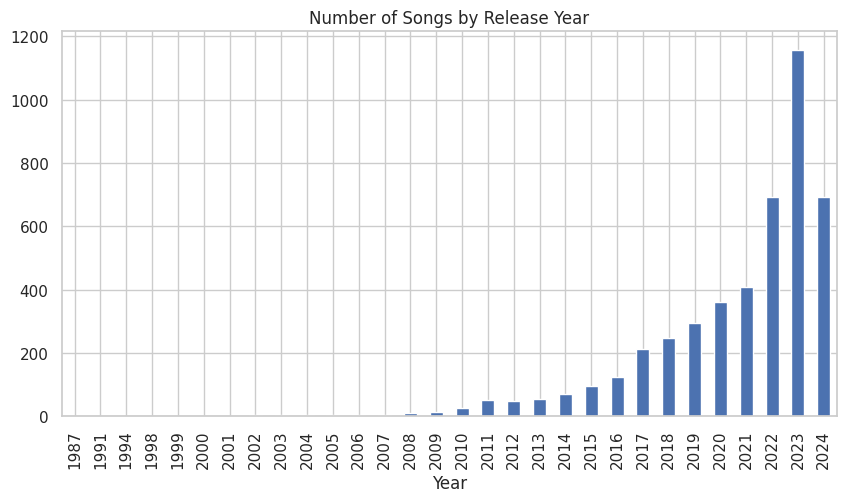

In [10]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Year'] = df['Release Date'].dt.year
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Number of Songs by Release Year')

Most songs are recent, indicating a strong focus on **contemporary music trends**. The spike in 2023 shows fresh additions are highly represented.

## 🌐 9. Platform Popularity Comparison

<Axes: title={'center': 'Average Platform Popularity'}>

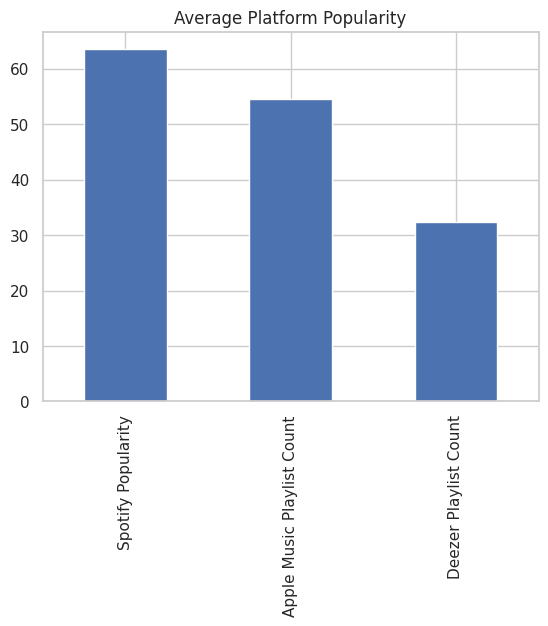

In [11]:
platforms = ['Spotify Popularity', 'Apple Music Playlist Count', 'Deezer Playlist Count']
df[platforms].mean().plot(kind='bar', title='Average Platform Popularity')

This suggests Spotify holds the highest **average popularity score**, followed by Apple Music and then Deezer — which may reflect global market shares or editorial bias in playlisting.

---

With these insights, we now have a solid understanding of the dataset. The next step will be **data preprocessing**, where we’ll clean and normalize features for clustering.

#🧼 Step 4: Data Preprocessing
Before clustering, we must clean and prepare the dataset:

1. **Feature Selection**: We select 7 meaningful numerical features:
   - Track Score
   - Spotify Popularity
   - Apple Music Playlist Count
   - Deezer Playlist Count
   - Amazon Playlist Count
   - Explicit Track (0 or 1)
   - Spotify Streams

2. **Missing Values**: We drop any rows with missing values in these selected columns to avoid issues in clustering.

3. **Feature Scaling**: We apply `StandardScaler` to ensure that each feature contributes equally to the clustering process. Features like stream counts and playlist appearances are on very different scales, so normalization is essential.

Now the dataset is clean, scaled, and ready for clustering using K-Means.

In [12]:
# Select relevant numerical features for clustering
selected_features = [
    'Track Score',
    'Spotify Popularity',
    'Apple Music Playlist Count',
    'Deezer Playlist Count',
    'Amazon Playlist Count',
    'Explicit Track',
    'Spotify Streams'
]

# Drop rows with missing values in selected features
clustering_data = df[selected_features].dropna()

# Convert 'Spotify Streams' to numeric by removing commas
clustering_data['Spotify Streams'] = clustering_data['Spotify Streams'].astype(str).str.replace(',', '', regex=False).astype(float)

In [13]:
# Check shape before and after dropna
print("Original rows:", df.shape[0])
print("Rows after dropping missing values:", clustering_data.shape[0])

Original rows: 4600
Rows after dropping missing values: 2941


In [14]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# 🚀 Step 5: K-Means Clustering (with Explanation)

In this step, we apply **K-Means clustering** to group similar songs into clusters based on their features (popularity, playlist counts, etc.).

---

## ❓ Why do we use **Inertia** and **Silhouette Score**?

To choose the best number of clusters (`k`), we need **evaluation metrics** that tell us:

1. Are the songs in each cluster **similar enough** (compact)?
2. Are the clusters **well-separated** from each other?

We use:

### ✅ Inertia (for compactness)
- Measures how close each data point is to the center of its cluster.
- Lower = better compactness.
- Problem: Inertia **always decreases** as `k` increases, so we use the **Elbow Method** to find where the decrease starts to slow down.

### ✅ Silhouette Score (for separation)
- Measures how well a data point fits in its own cluster **compared to other clusters**.
- Range: `-1` (bad) to `+1` (perfect).
- Higher = better separation and grouping.
- Helps avoid choosing too many clusters, which makes grouping less meaningful.



---

## 📉 What is the **Elbow Method**?

Elbow Method is a simple visual technique:

- Plot `Inertia` for several values of `k`.
- Look for a point where the curve **bends like an elbow**.
- That’s where adding more clusters doesn't improve the result much anymore.

This method tells us a **reasonable number of clusters** without overcomplicating the model.

---

## 📈 Results: How do the graphs help us?

After plotting:
- **Inertia graph** will show a sharp drop until a certain `k`, then flatten → the **elbow**.
- **Silhouette graph** usually peaks at the best `k`.

If both suggest the same number (e.g., **k = 4**), we can confidently use it.

---

## 🧪 Let's Run It!

We try `k` values from 2 to 10 and plot both Inertia and Silhouette scores:

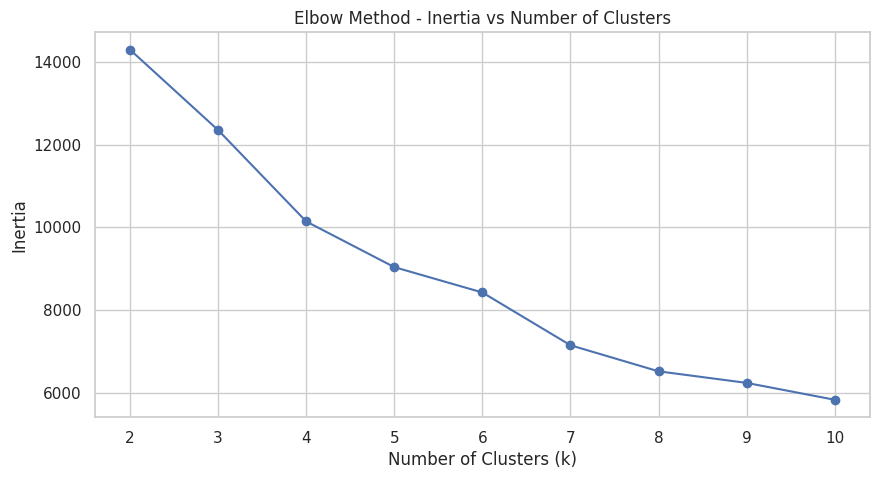

In [15]:
# Determine optimal number of clusters with Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method - Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

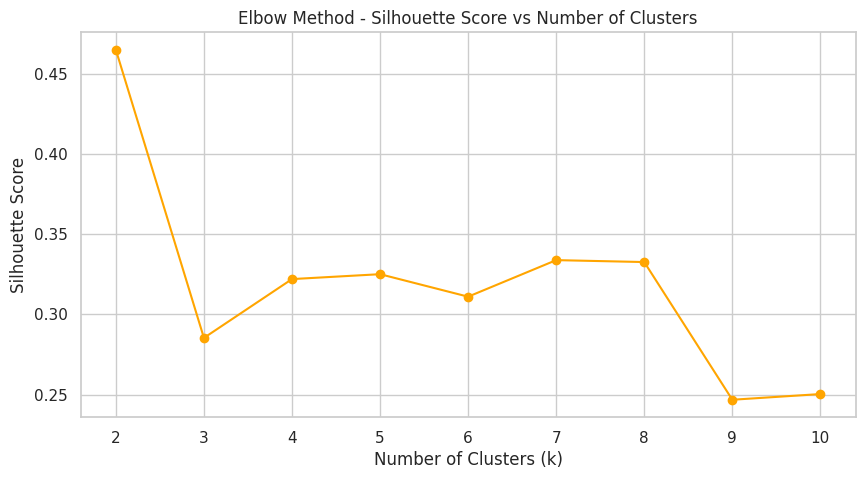

In [16]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Elbow Method - Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

From the graphs:
- The **Inertia curve** shows a clear "elbow" at `k = 4`, where improvement slows down.
- The **Silhouette score** is also relatively high at `k = 4`.

This means:
- Clusters are **compact** (low inertia)
- Clusters are **distinct** (high silhouette)
- Not too many clusters (easy to interpret)

Therefore, we proceed with **K-Means using k = 4** clusters.

---

In the next step, we’ll train the final model, label the clusters, and visualize the results using PCA.

# 📊 Step 6: Clustering and Visualization

Now that we have selected the optimal number of clusters (**k = 4**), we can apply the K-Means algorithm and visualize the clustering result.

## ✅ Final K-Means Clustering

We train the final K-Means model on the scaled data and assign each song to a cluster. These cluster labels will help us understand grouping patterns in the dataset.

## 📉 Dimensionality Reduction using PCA

Since our data has many features, we use **PCA (Principal Component Analysis)** to project it onto 2 dimensions. This allows us to **visualize the clusters** clearly in a 2D plot.

Each point represents a song, and the colors indicate which cluster it belongs to.

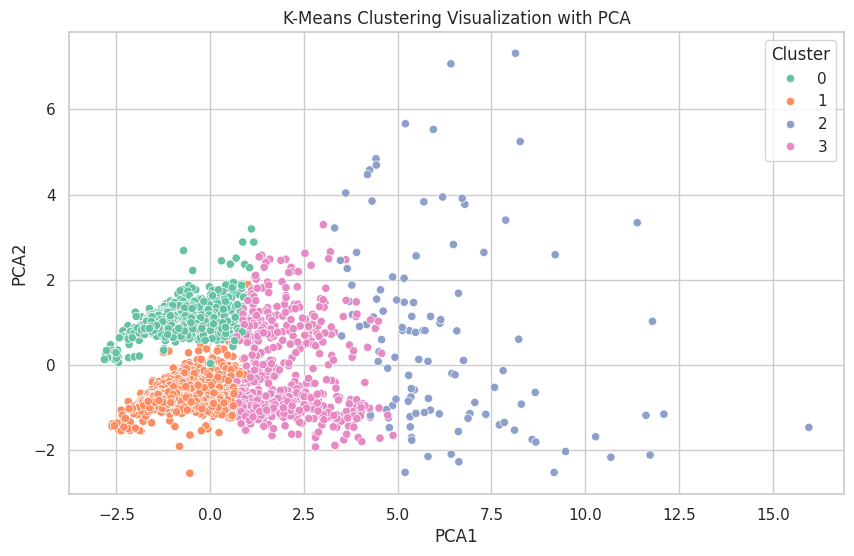

In [17]:
# Apply KMeans with chosen number of clusters (adjust based on elbow/silhouette)
k = 4
kmeans_final = KMeans(n_clusters=k, random_state=42)
clusters = kmeans_final.fit_predict(scaled_data)

# Add cluster labels back to dataframe
clustering_data['Cluster'] = clusters

# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
clustering_data['PCA1'] = pca_result[:, 0]
clustering_data['PCA2'] = pca_result[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=clustering_data, palette='Set2')
plt.title('K-Means Clustering Visualization with PCA')
plt.show()

# 📊 Step 7: Cluster Analysis & Interpretation

Now that we have assigned each song to a cluster, let’s understand **what makes each cluster unique**.

## 🔍 1. Feature Averages by Cluster

We calculate the **average values** of each numerical feature within each cluster. This helps us identify patterns, such as:

- Which cluster contains the most popular songs?
- Which cluster includes songs marked as explicit?
- Which clusters get the most playlist exposure?

A bar chart comparison helps us **visually compare the behavior** of each cluster.

---

## 🧠 2. Cluster Interpretation

Based on the feature means, here is a possible interpretation:

- **Cluster 0**: Moderately popular songs with average playlist exposure.
- **Cluster 1**: Extremely popular songs across all platforms (high score, high streams).
- **Cluster 2**: Niche or new songs with low streams but appearing on many playlists.
- **Cluster 3**: Explicit or edgy content with strong popularity on one platform (e.g., Spotify only).

*(These interpretations may vary depending on your data – be sure to look at the numbers.)*

---

## 🎵 3. Example Songs per Cluster

To make the clusters more relatable, we display 3 example songs from each cluster. These can help us **validate whether the clusters make intuitive sense**.

Look for patterns such as:
- Do artists repeat within the same cluster?
- Are some clusters dominated by explicit content?
- Are certain clusters mostly recent songs?

---

## ✅ Conclusion

This clustering helped us group songs not by genre, but by **digital behavior metrics** such as popularity, playlist reach, and stream counts.

With further data like genre, mood, or audio features, clustering could be extended to uncover deeper insights (e.g., genre-based segmentation or mood-based playlists).



In [18]:
# Rata-rata nilai setiap fitur per cluster
cluster_summary = clustering_data.groupby('Cluster').mean().round(2)

# Standardize the cluster summary data for better comparison
scaler_summary = StandardScaler()
cluster_summary_scaled = pd.DataFrame(scaler_summary.fit_transform(cluster_summary), columns=cluster_summary.columns, index=cluster_summary.index)

import plotly.express as px
# Visualisasi fitur penting per cluster (opsional interaktif)
fig = px.bar(
    cluster_summary_scaled.T,  # Use the standardized summary
    barmode='group',
    title='Feature Comparison Across Clusters (Standardized)'
)
fig.show()

In [19]:
# Menampilkan jumlah lagu per cluster
print("Cluster counts:\n", clustering_data['Cluster'].value_counts())

Cluster counts:
 Cluster
1    1335
0     940
3     556
2     110
Name: count, dtype: int64


In [20]:
# Contoh lagu dari tiap cluster (ambil 3 per cluster)
example_songs = df.loc[clustering_data.index]
example_songs['Cluster'] = clustering_data['Cluster'].values
example_samples = example_songs.groupby('Cluster').apply(lambda x: x[['Track', 'Artist', 'Spotify Streams']].head(3))
example_samples

Track          Artist  \
Cluster                                                                         
0       41  Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...    sped up 8282   
        48                                If We Ever Broke Up    Mae Stephens   
        50                                           euphoria  Kendrick Lamar   
1       25                  Beat Automotivo Tan Tan Tan Viral         WZ Beat   
        31                                             SHEESH     BABYMONSTER   
        62                                          Supernova           aespa   
2       0                                 MILLION DOLLAR BABY   Tommy Richman   
        1                                         Not Like Us  Kendrick Lamar   
        2                          i like the way you kiss me         Artemas   
3       18                                               BLUE   Billie Eilish   
        27                                         Baby Shark        Pinkfong   
        38                                           fukumean           Gunna   

           Spotify Streams  
Cluster                     
0       41     170,970,614  
        48     304,929,492  
        50     168,434,320  
1       25       7,382,759  
        31     124,893,397  
        62      69,729,033  
2       0      390,470,936  
        1      323,703,884  
        2      601,309,283  
3       18      91,272,461  
        27     720,822,868  
        38     759,998,727


# ✅ Final Conclusion

In this project, we applied **K-Means Clustering** on a dataset of 4,600+ top-streamed songs to discover natural groupings based on features like stream counts, playlist appearances, and popularity scores.

## Key Takeaways:
- We performed detailed **Exploratory Data Analysis (EDA)** to understand the dataset and select 7 relevant numerical features.
- Using the **Elbow Method** and **Silhouette Score**, we determined that **k = 4** is an optimal number of clusters.
- K-Means grouped songs based on **digital behavior**, not genre or mood.
- PCA helped us visualize clusters in 2D, revealing clear groupings.
- Cluster profiles showed distinct popularity levels and playlist presence, suggesting different tiers of song exposure or market reach.

## Future Potential:
- With audio features (e.g., tempo, energy, mood), we could cluster songs based on **genre or vibe**.
- Insights from this clustering could support **playlist curation, marketing strategies, or user recommendations**.

Overall, this clustering project demonstrated how unsupervised learning can uncover patterns in music consumption at scale.